# Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df=pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# #Data Structure and Content

In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis
### Exploratory Data Analysis (eda) - Outliers

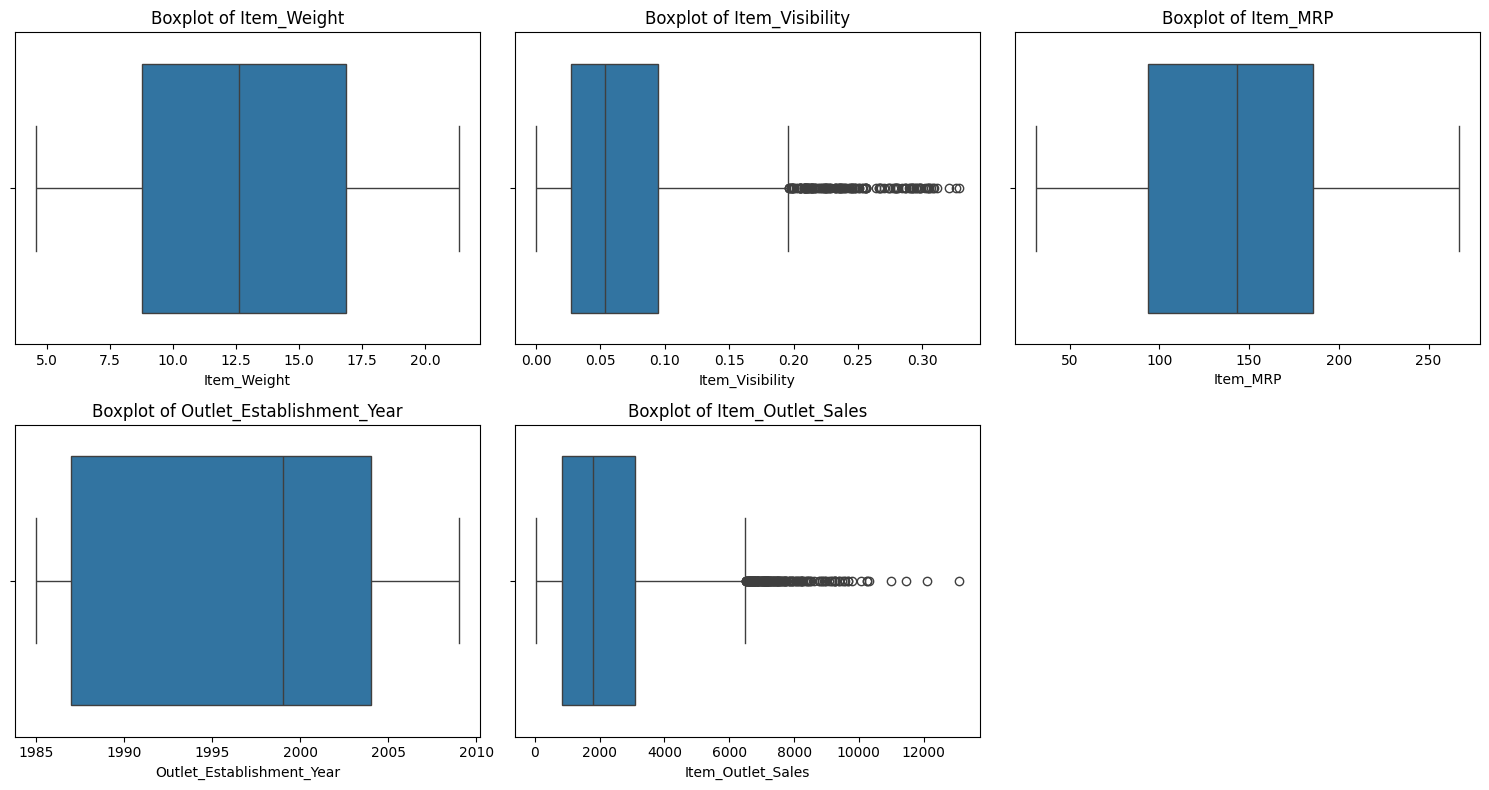

In [5]:

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')


# Create box plots for each numeric column
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Univariate Analysis

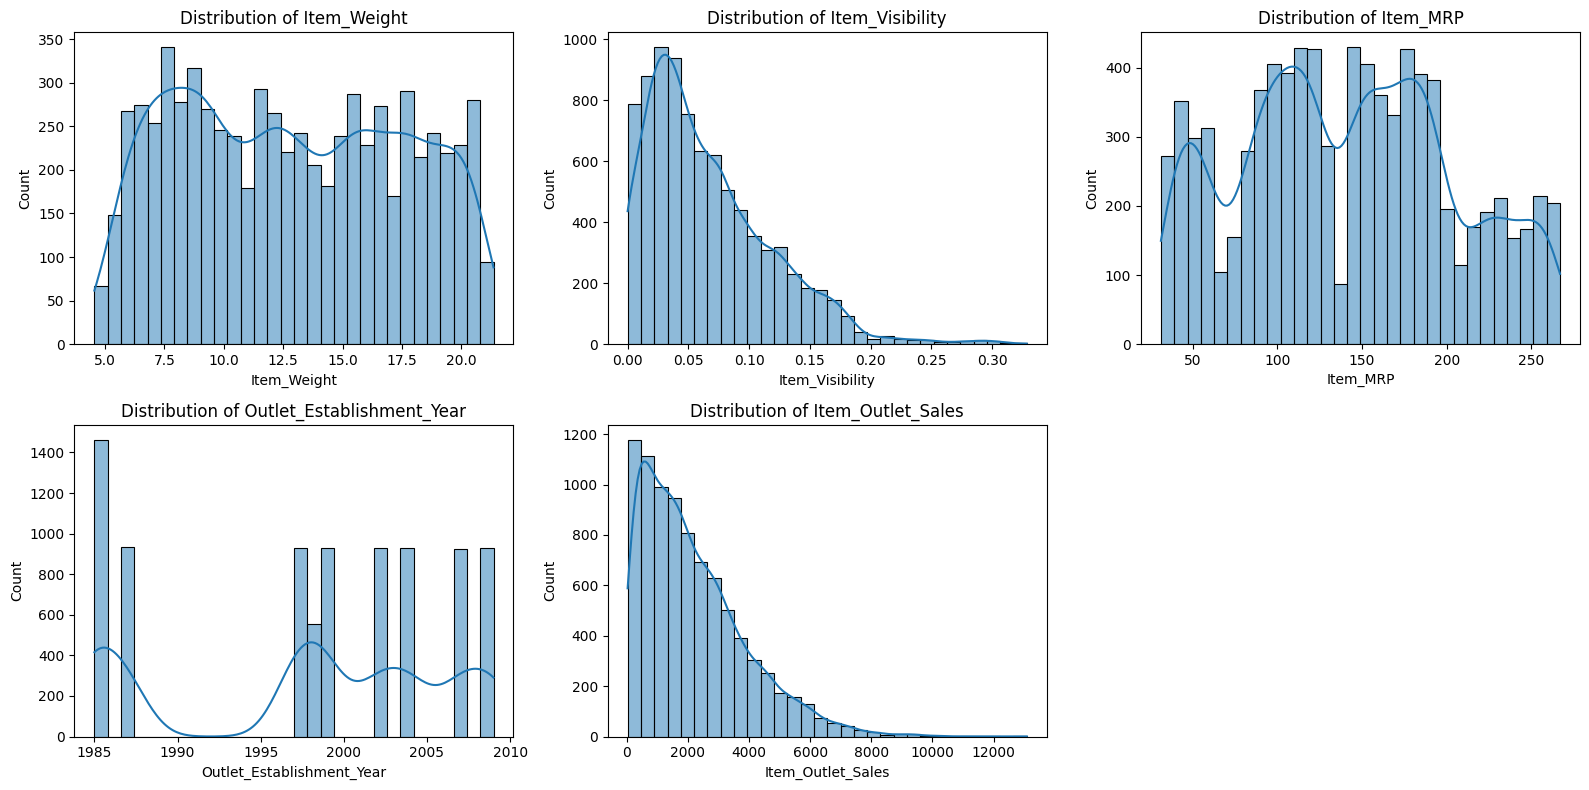

In [6]:
# Numeric variables
numeric_columns = df.select_dtypes(include='number')

plt.figure(figsize=(16, 8))

# Subplot for numeric variables
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

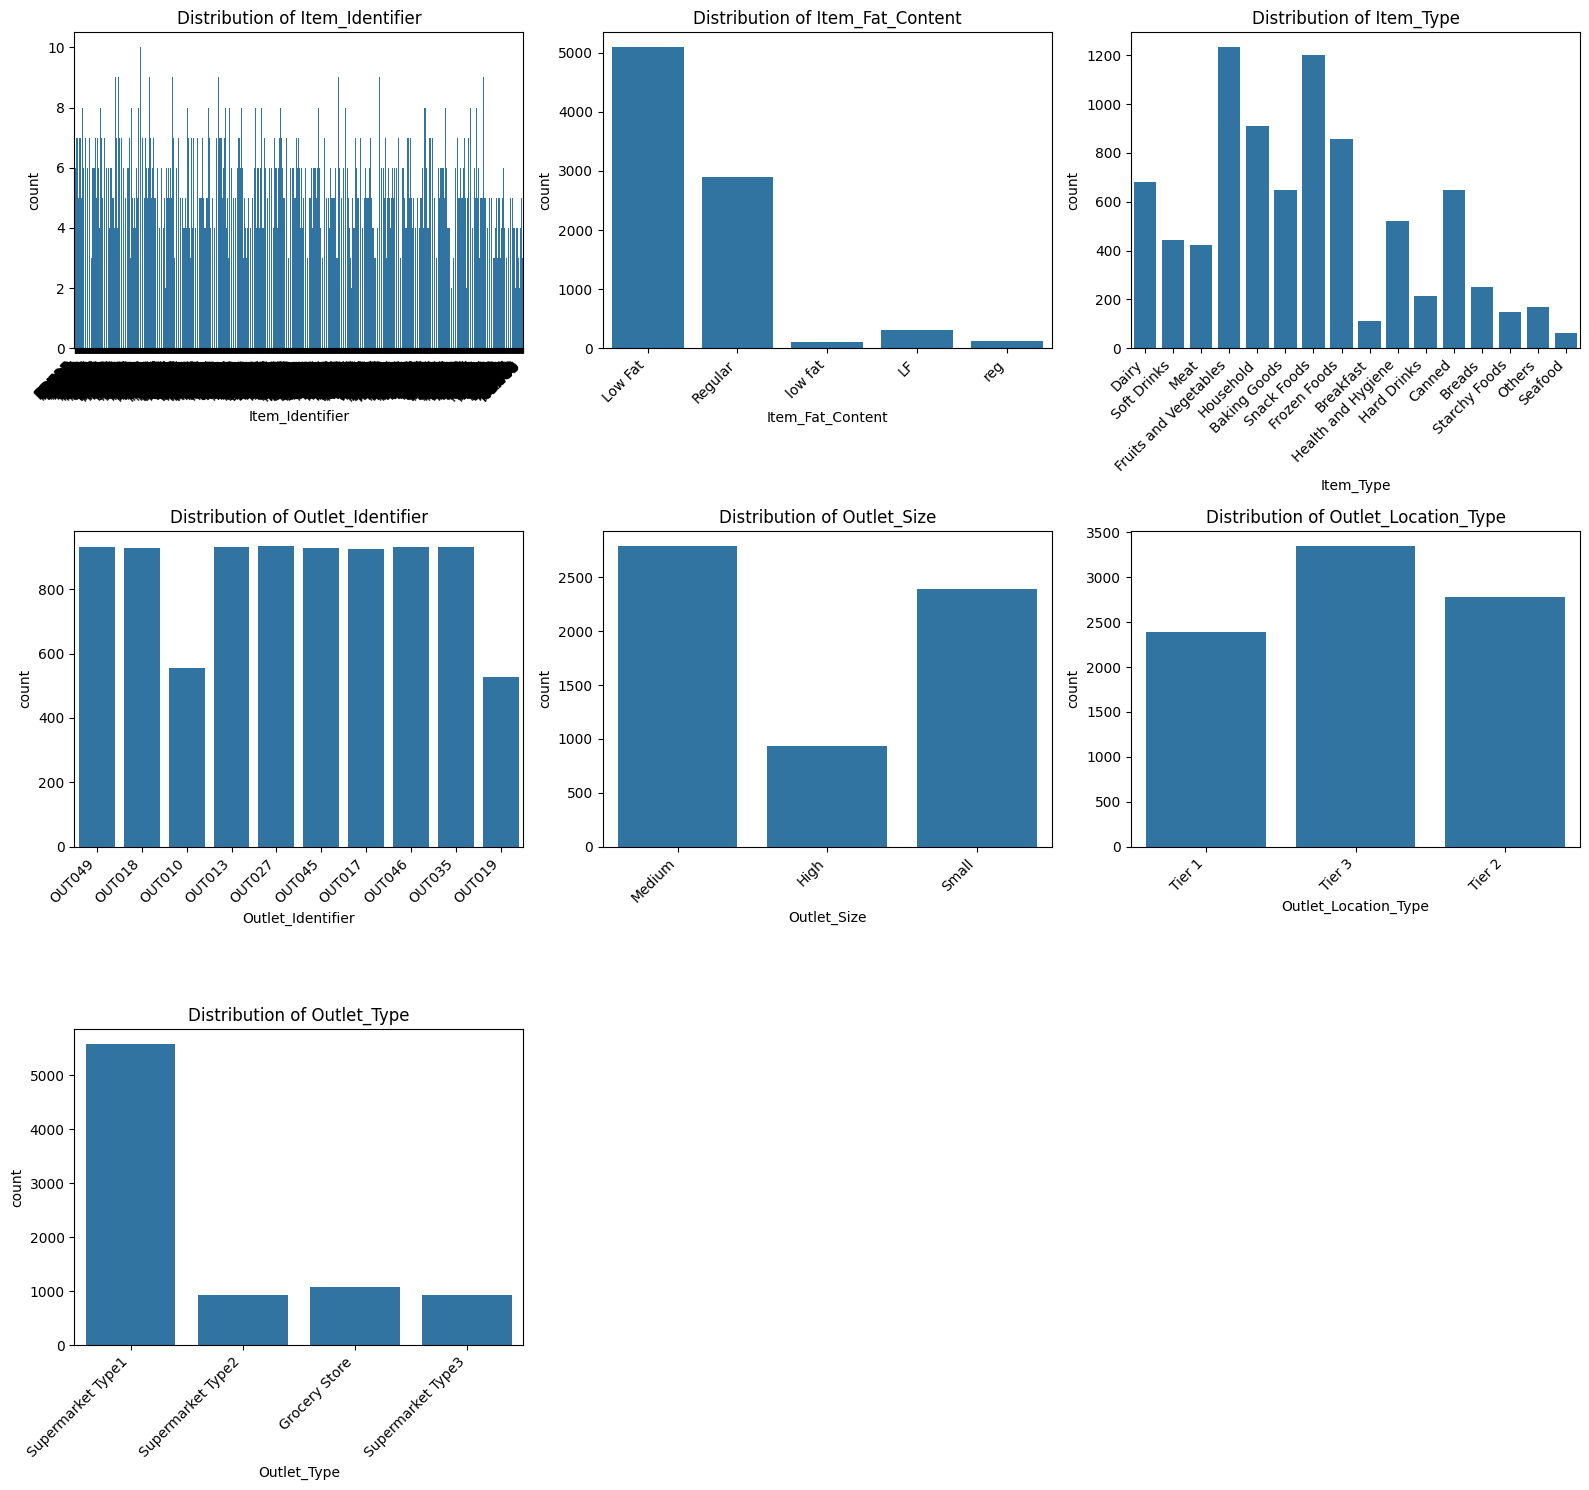

In [7]:
# Categorical variables
categorical_columns = df.select_dtypes(include='object').columns

# Determine the number of rows and columns for subplots
num_rows = (len(categorical_columns) - 1) // 3 + 1
num_cols = min(len(categorical_columns), 3)

plt.figure(figsize=(16, 5 * num_rows))

# Subplot for categorical variables
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Bivariate Analysis

<Figure size 1500x1000 with 0 Axes>

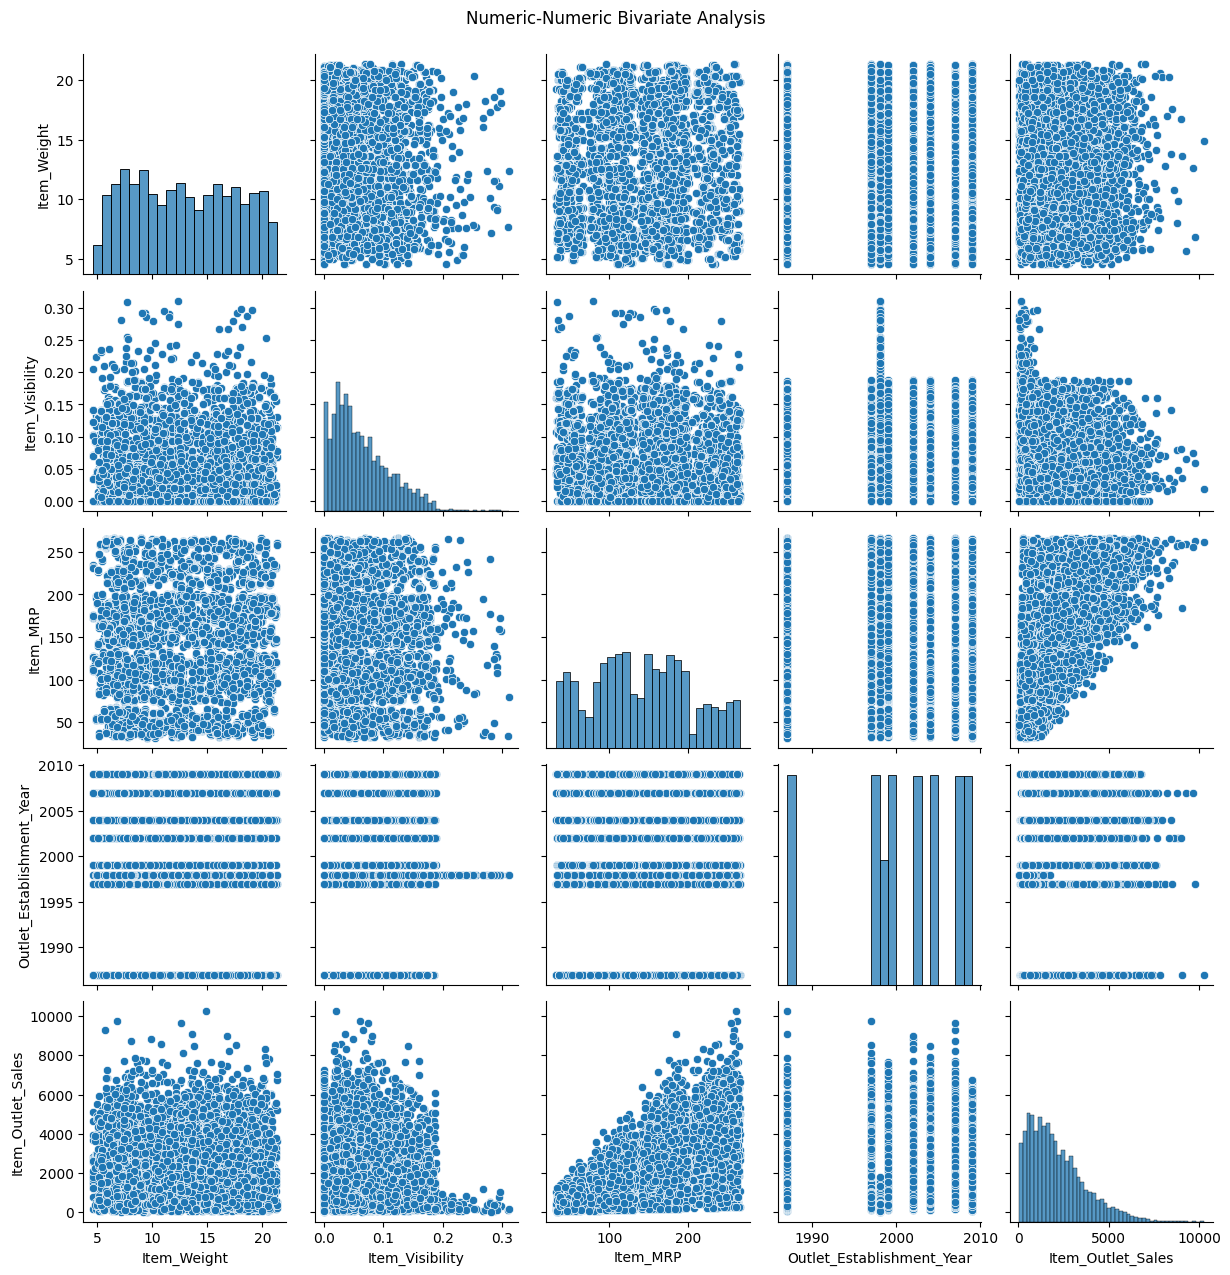

In [8]:
# Numeric-Numeric Bivariate Analysis
numeric_columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))

# Pairwise scatter plots
sns.pairplot(df[numeric_columns].dropna())
plt.suptitle('Numeric-Numeric Bivariate Analysis', y=1.02)
plt.show()

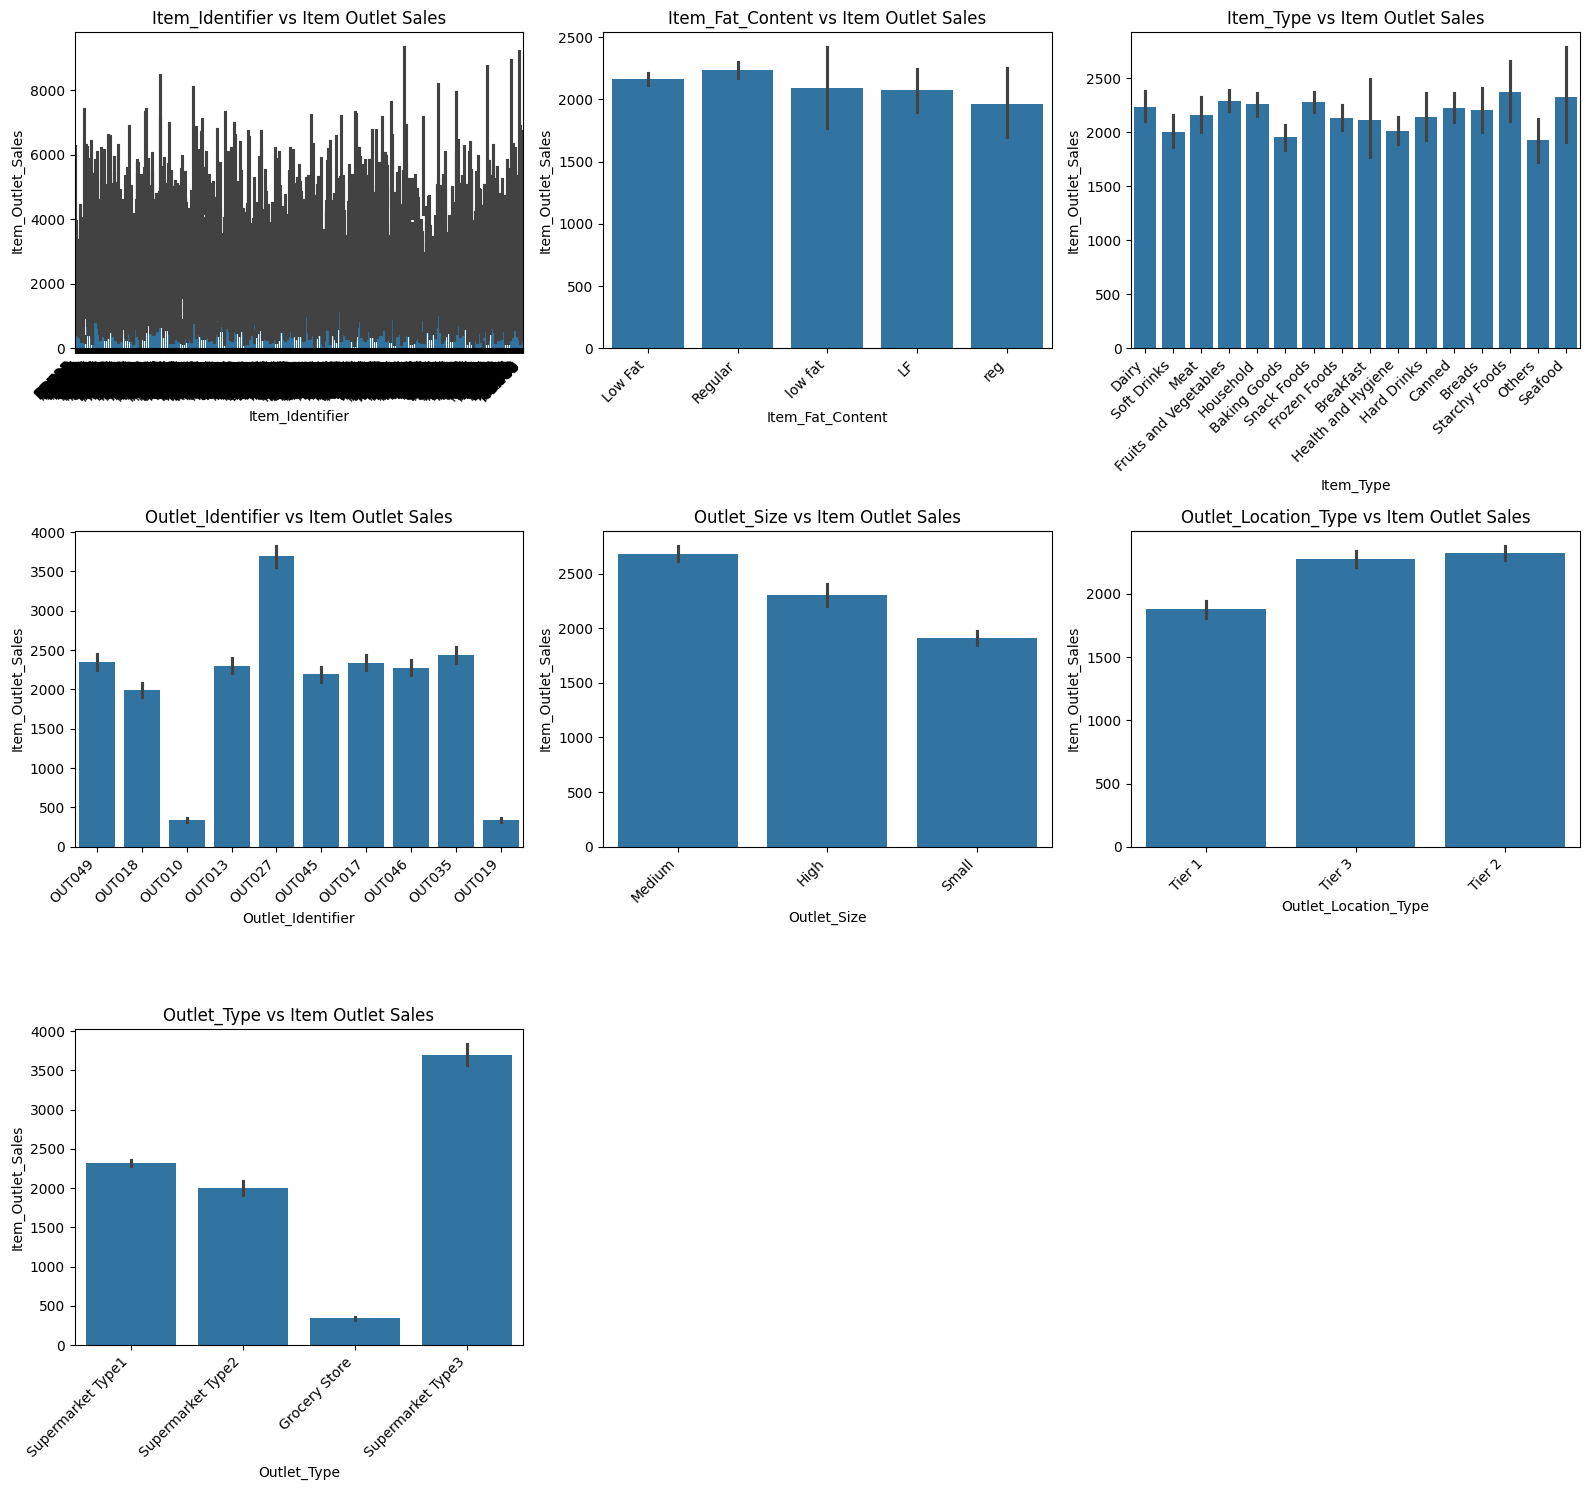

In [9]:
# Categorical-Numeric Bivariate Analysis
categorical_columns = df.select_dtypes(include='object').columns

# Determine the number of rows and columns for subplots
num_rows = (len(categorical_columns) - 1) // 3 + 1
num_cols = min(len(categorical_columns), 3)

plt.figure(figsize=(16, 5 * num_rows))

# Subplot for categorical variables
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.barplot(x=col, y='Item_Outlet_Sales', data=df)
    plt.title(f'{col} vs Item Outlet Sales')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

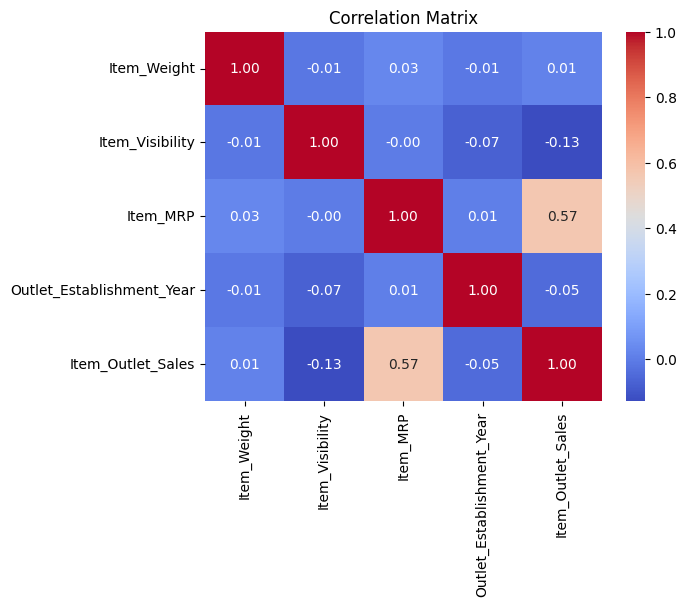

In [12]:
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Missing Value Treatment

In [15]:
# Impute 'Item_Weight'
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Impute 'Outlet_Size'
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# outliers Treatment

In [16]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Item_Visibility.quantile(0.75)-df.Item_Visibility.quantile(0.25)

In [17]:
lower_bridge=df['Item_Visibility'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Item_Visibility'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-0.07440424500000001
0.195979015


(None, None)

In [18]:
df.loc[df['Item_Visibility']>=0.20,'Item_Visibility']=0.20

In [19]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Item_Outlet_Sales.quantile(0.75)-df.Item_Outlet_Sales.quantile(0.25)

In [20]:
lower_bridge=df['Item_Outlet_Sales'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Item_Outlet_Sales'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-2566.3261
6501.8699


(None, None)

In [21]:
df.loc[df['Item_Outlet_Sales']>=6502,'Item_Outlet_Sales']=6502

# Feature Engineering
### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to specified columns in one line
df[['Item_Identifier_Encoded', 'Item_Fat_Content_Encoded', 'Outlet_Size_Encoded']] = df[['Item_Identifier', 'Item_Fat_Content', 'Outlet_Size']].apply(label_encoder.fit_transform)

# Drop the original columns
df = df.drop(['Item_Identifier', 'Item_Fat_Content', 'Outlet_Size'], axis=1)

### One Hot Encoding

In [23]:
# Apply One-Hot Encoding to specified columns in one line
df = pd.get_dummies(df, columns=['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Encoded,Item_Fat_Content_Encoded,Outlet_Size_Encoded,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,156,1,1,False,False,...,False,False,False,False,True,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,8,2,1,False,False,...,False,False,False,False,False,False,True,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,662,1,1,False,False,...,False,False,False,False,True,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,1121,2,1,False,False,...,False,False,False,False,False,False,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,1297,1,0,False,False,...,False,False,False,False,False,False,True,True,False,False


# PreProcessing Data
### Seperating Training And Test Data

In [24]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing features and the target variable
X = df.drop('Item_Outlet_Sales', axis=1)  # Features (all columns except the target)
y = df['Item_Outlet_Sales']  # Target variable

In [25]:
y = np.log1p(y)

In [26]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Test set shape - X:", X_test.shape, " y:", y_test.shape)

Training set shape - X: (6818, 36)  y: (6818,)
Test set shape - X: (1705, 36)  y: (1705,)


### Robust Scaling

In [27]:
numeric_columns=[	"Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]

In [28]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
# Initialize RobustScaler
robust_scaler = RobustScaler()
# Apply Robust Scaling to numeric columns
X_train[numeric_columns] = robust_scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = robust_scaler.transform(X_test[numeric_columns])

# Check the scaled data
print("Scaled Training Data:")
print(X_train.head())

print("\nScaled Test Data:")
print(X_test.head())

Scaled Training Data:
      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
549     -0.500767        -0.278882  0.292208                   0.000000   
7757     0.766943        -0.098087  0.283549                   0.176471   
764      0.707286         0.324138 -0.351127                  -0.117647   
6867    -0.676010        -0.357887 -1.107559                   0.176471   
2716    -0.001140         1.224718  0.121927                  -0.117647   

      Item_Identifier_Encoded  Item_Fat_Content_Encoded  Outlet_Size_Encoded  \
549                      1102                         2                    1   
7757                     1322                         1                    1   
764                      1169                         2                    2   
6867                      789                         1                    1   
2716                      757                         1                    2   

      Item_Type_Breads  Item_Type_Breakfast  I

# Modeling
### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are already defined

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print model evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)

Training RMSE: 0.5348082980587614
Testing RMSE: 0.530806546690021
Training R^2 Score: 0.7177650260721178
Testing R^2 Score: 0.7297193968444927


### Regularized Linear Regression

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are already defined

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions on the training and test sets
train_predictions_ridge = ridge_model.predict(X_train)
test_predictions_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, train_predictions_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, test_predictions_ridge))
train_r2_ridge = r2_score(y_train, train_predictions_ridge)
test_r2_ridge = r2_score(y_test, test_predictions_ridge)

# Print Ridge model evaluation metrics
print("Ridge Training RMSE:", train_rmse_ridge)
print("Ridge Testing RMSE:", test_rmse_ridge)
print("Ridge Training R^2 Score:", train_r2_ridge)
print("Ridge Testing R^2 Score:", test_r2_ridge)

Ridge Training RMSE: 0.5348117149810327
Ridge Testing RMSE: 0.5308728579910458
Ridge Training R^2 Score: 0.7177614196282671
Ridge Testing R^2 Score: 0.7296518627191215


In [31]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Make predictions on the training and test sets
train_predictions_lasso = lasso_model.predict(X_train)
test_predictions_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, train_predictions_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, test_predictions_lasso))
train_r2_lasso = r2_score(y_train, train_predictions_lasso)
test_r2_lasso = r2_score(y_test, test_predictions_lasso)

# Print Lasso model evaluation metrics
print("Lasso Training RMSE:", train_rmse_lasso)
print("Lasso Testing RMSE:", test_rmse_lasso)
print("Lasso Training R^2 Score:", train_r2_lasso)
print("Lasso Testing R^2 Score:", test_r2_lasso)

Lasso Training RMSE: 1.0066627249003444
Lasso Testing RMSE: 1.0227824022012713
Lasso Training R^2 Score: 4.0223842146303035e-05
Lasso Testing R^2 Score: -0.0034802568646368215


### RandomForest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are already defined

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the training and test sets
train_predictions_rf = rf_model.predict(X_train)
test_predictions_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, train_predictions_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, test_predictions_rf))
train_r2_rf = r2_score(y_train, train_predictions_rf)
test_r2_rf = r2_score(y_test, test_predictions_rf)

# Print Random Forest model evaluation metrics
print("Random Forest Training RMSE:", train_rmse_rf)
print("Random Forest Testing RMSE:", test_rmse_rf)
print("Random Forest Training R^2 Score:", train_r2_rf)
print("Random Forest Testing R^2 Score:", test_r2_rf)

Random Forest Training RMSE: 0.2062153793946453
Random Forest Testing RMSE: 0.5417025374265354
Random Forest Training R^2 Score: 0.9580379537274993
Random Forest Testing R^2 Score: 0.718509282488343


### XGBoost

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are already defined

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # 'reg:squarederror' for regression
    'eval_metric': 'rmse',  # Root Mean Squared Error as the evaluation metric
    'seed': 42  # Set a seed for reproducibility
}

# Train the XGBoost model
num_round = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions on the training and test sets
train_predictions_xgb = xgb_model.predict(dtrain)
test_predictions_xgb = xgb_model.predict(dtest)

# Evaluate the XGBoost model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, train_predictions_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, test_predictions_xgb))
train_r2_xgb = r2_score(y_train, train_predictions_xgb)
test_r2_xgb = r2_score(y_test, test_predictions_xgb)

# Print XGBoost model evaluation metrics
print("XGBoost Training RMSE:", train_rmse_xgb)
print("XGBoost Testing RMSE:", test_rmse_xgb)
print("XGBoost Training R^2 Score:", train_r2_xgb)
print("XGBoost Testing R^2 Score:", test_r2_xgb)


XGBoost Training RMSE: 0.3116497670821129
XGBoost Testing RMSE: 0.5596612484670251
XGBoost Training R^2 Score: 0.9041596990935182
XGBoost Testing R^2 Score: 0.6995357457242324


# Hyper Parameter Tuning XGB And GBR

In [34]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming 'X_train', 'y_train' are already defined

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Set XGBoost parameters
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor()

# Grid Search with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=3)
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

# Make predictions on the test set
test_predictions_xgb = best_model_xgb.predict(X_test)

# Evaluate the best XGBoost model
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, test_predictions_xgb))

# Print results
print("Best XGBoost Model:", best_params_xgb)
print("XGBoost Testing RMSE:", test_rmse_xgb)


Best XGBoost Model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Testing RMSE: 0.5186289776797964


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Set GBR parameters
param_grid_gbr = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize GBR model
gbr_model = GradientBoostingRegressor()

# Grid Search with cross-validation
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr, scoring='neg_mean_squared_error', cv=3)
grid_search_gbr.fit(X_train, y_train)

# Get the best parameters and best model
best_params_gbr = grid_search_gbr.best_params_
best_model_gbr = grid_search_gbr.best_estimator_

# Make predictions on the test set
test_predictions_gbr = best_model_gbr.predict(X_test)

# Evaluate the best GBR model
test_rmse_gbr = np.sqrt(mean_squared_error(y_test, test_predictions_gbr))

# Print results
print("Best GBR Model:", best_params_gbr)
print("GBR Testing RMSE:", test_rmse_gbr)

Best GBR Model: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'n_estimators': 100, 'subsample': 0.8}
GBR Testing RMSE: 0.5201436719957696


In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are already defined

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the best XGBoost parameters obtained from grid search
best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

# Update the params dictionary with the best parameters
params.update(best_params)

# Train the XGBoost model
num_round = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions on the training and test sets
train_predictions_xgb = xgb_model.predict(dtrain)
test_predictions_xgb = xgb_model.predict(dtest)

# Evaluate the XGBoost model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, train_predictions_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, test_predictions_xgb))
train_r2_xgb = r2_score(y_train, train_predictions_xgb)
test_r2_xgb = r2_score(y_test, test_predictions_xgb)

# Print XGBoost model evaluation metrics
print("XGBoost Training RMSE:", train_rmse_xgb)
print("XGBoost Testing RMSE:", test_rmse_xgb)
print("XGBoost Training R^2 Score:", train_r2_xgb)
print("XGBoost Testing R^2 Score:", test_r2_xgb)


c:\Users\Lenovo\anaconda3\envs\bigmart\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training RMSE: 0.5000176406959288
XGBoost Testing RMSE: 0.5170827965822766
XGBoost Training R^2 Score: 0.7532908775766824
XGBoost Testing R^2 Score: 0.7435146782354204


# saving model

In [37]:
import joblib
joblib.dump(xgb_model, 'xgboost_model.joblib')

['xgboost_model.joblib']